In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
#extracting residuals standardization
train_data_tot = pd.read_csv("train24.csv",header=None)
test_data_tot = pd.read_csv("test24.csv",header=None)

#sampling the train_data
#train_data_tot = train_data_tot.sample(frac=1)
train_data_tot = pd.DataFrame(train_data_tot.to_numpy(),columns=['x','y','label'])
test_data_tot = pd.DataFrame(test_data_tot.to_numpy(),columns=['x','y','label'])
# taking only features for normalization
train_data = train_data_tot[['x','y']]
test_data = test_data_tot[['x','y']].to_numpy()

#splitting the train data into train and validation data
frac = 0.75
validation_data = train_data[int(frac*79):].to_numpy()
train_data = train_data[0:int(frac*79)].to_numpy()

#train data normalization
train_mean = np.mean(train_data,0)
train_data = np.array([i-train_mean for i in train_data])
x = len(train_data)
train_data = train_data/(np.var(train_data,0))**0.5
train_data = pd.DataFrame(train_data,columns = ['x','y'])
train_data['label'] = list(train_data_tot['label'][0:int(frac*79)].values)
train_data = train_data.drop(['y'],axis=1)

#test data normalization
test_mean = np.mean(test_data,0)
test_data = np.array([i-test_mean for i in test_data])
x = len(test_data)
test_std = (np.var(test_data,0))**0.5
test_data = (test_data/test_std)
test_data = pd.DataFrame(test_data,columns = ['x','y'])
test_data['label'] = list(test_data_tot['label'].values)
test_data = test_data.drop(['y'],axis=1)

#validation data normalization
validation_mean = np.mean(validation_data,0)
validation_data = np.array([i-validation_mean for i in validation_data])
x = len(validation_data)
validation_data = validation_data/(np.var(validation_data,0))**0.5
validation_data = pd.DataFrame(validation_data,columns = ['x','y'])
validation_data['label'] = list(train_data_tot['label'][int(frac*79):].values)
validation_data = validation_data.drop(['y'],axis=1)

In [9]:
class RidgeRegressor: #ridge regression with lambda 0 for ridge regression you have to add 2*lambda*identity matrix to x*xtranspose
  def __init__(self):
    self.degree = 0
    self.weight = []
    self.mse = 0
    self.feature = []
    self.label = []
    self.lam = 0

  def set_par(self,degree,lam):
    k = (degree+1)
    self.weight = np.zeros((k,1))
    self.degree = degree
    self.lam = lam

  def fit(self,df,feature,label):
    f = df[feature].to_numpy()
    l = df[label].to_numpy()
    x = np.ones((len(f),len(self.weight)))
    for k in range(len(f)):
      for i in range(self.degree+1):
        x[k][i] = (f[k][0]**(i))
    k = np.transpose(x) #transpose of terms of matrix
    a = np.matmul(k,x)
    b = np.matmul(k,l)
    iden = np.zeros((len(self.weight),len(self.weight)))
    for i in range(len(iden)):
      iden[i,i] = 2*(self.lam)
    a = np.add(a,iden)
    a_inv = np.linalg.inv(a)
    self.weight = np.matmul(a_inv,b)
    out = np.matmul(x,self.weight)
    self.mse = np.average(np.square(np.subtract(out,l)))

    return self.mse,out
  
  def predict(self,df,feature,label):
    f = df[feature].to_numpy()
    l = df[label].to_numpy()
    x = np.ones((len(f),len(self.weight)))
    for k in range(len(f)):
      for i in range(self.degree+1):
        x[k][i] = (f[k][0]**(i))
    out = np.matmul(x,self.weight)
    return np.average(np.square(np.subtract(out,l))),out

  def predict2(self,f):
    x = np.ones((len(f),len(self.weight)))
    for k in range(len(f)):
      for i in range(self.degree+1):
        x[k][i] = (f[k][0]**(i))
    out = np.matmul(x,self.weight)
    return out
  pass

In [10]:
def build_model():
  
  model = RidgeRegressor()

  return model

def train_model(model, df, feature, label, degree, lam):

  model.set_par(degree,lam)

  mse,trained_prediction = model.fit(df,feature,label)

  return mse,trained_prediction

In [11]:
def plot_model(degree,lam):

  model = build_model()
  mse, predict_train = train_model(model, train_data, ['x'], ['label'], degree,lam)
  mse_test, predict_test = model.predict(validation_data, ['x'], ['label'])

  # fig = plt.figure(figsize=(40,10))
  # ax = fig.add_subplot(1,2,1,projection = '3d')
  # bx = fig.add_subplot(1,2,2,projection = '3d')

  # x = (train_data['x'].to_numpy()).flatten()
  # y = (train_data['y'].to_numpy()).flatten()
  # label = (train_data['label'].to_numpy()).flatten()
  # x_test = validation_data['x'].to_numpy().flatten()
  # y_test = validation_data['y'].to_numpy().flatten()
  # label_test = validation_data['label'].to_numpy().flatten()

  # x_min,x_max = x.min()-0.1,x.max()+0.1 
  # y_min,y_max = y.min()-0.1,y.max()+0.1
  # xx,yy = np.meshgrid(np.arange(x_min,x_max,0.004),np.arange(y_min,y_max,0.004))
  # z = np.array(model.predict2(np.c_[xx.ravel(),yy.ravel()]))
  # z = z.reshape(xx.shape)

  # ax.set_xlabel('x')
  # ax.set_ylabel('y')
  # ax.set_zlabel('label')
  # ax.plot_surface(xx,yy,z,cmap='Paired_r',alpha=0.25,linewidth=0)

  # bx.set_xlabel('x')
  # bx.set_ylabel('y')
  # bx.set_zlabel('label')
  # bx.plot_surface(xx,yy,z,cmap='Paired_r',alpha=0.25)

  # ax.scatter3D(x, y, label)
  # bx.scatter3D(x_test, y_test, label_test)
  return mse,mse_test,predict_train.flatten(),predict_test.flatten(),model

def best_model():

  train = []
  test = []
  train_out = []
  test_out = []
  val = []
  a = [1,2,3,4,5,6]

  step = 0.1
  a = np.arange(0.01,0.1,0.01)
  # b = np.zeros(8)
  # b+=10
  # b = np.power(b,a)
  # b = np.arange(0,30)
  models = []
  for i in a:
    x = plot_model(10,i)
    train.append(x[0])
    val.append(x[1])
    train_out.append(x[2])
    test_out.append(x[3])
    models.append(x[4])
    ans = x[4].predict(test_data,['x'],['label'])
    test.append(ans[0])

  plt.figure(figsize = (10,10))
  plt.xlabel('λ')
  plt.ylabel('MSE')

  plt.plot(a,val,label = 'validation')
  plt.legend()

  plt.figure(figsize=(10,10))

  plt.xlabel('λ')
  plt.ylabel('MSE')

  plt.plot(a,test,label = 'test')
  plt.legend()

  print(val)
  print(test)
  t = np.argmin(np.array(val))
  print(a[t])
  return train_out[t],models[t],test[t],train[t]

def plot_best():
  
  out = best_model()
  fig = plt.figure(figsize = (30,15))
  ax = fig.add_subplot(1,2,1)
  bx = fig.add_subplot(1,2,2)

  x = train_data['x'].to_numpy().flatten()
  label = out[1].predict(train_data,['x'],['label'])[1]
  label_given = train_data['label'].to_numpy().flatten()
  x_test = test_data['x'].to_numpy().flatten()
  label_test = out[1].predict(test_data,['x'],['label'])[1]
  label_test_given = test_data['label'].to_numpy().flatten()

  ax.set_xlabel('x')
  ax.set_ylabel('label')
  bx.set_xlabel('x')
  bx.set_ylabel('label')
  ax.set_title("train")
  bx.set_title("test")
  ax.scatter(x, label_given, color = 'orange', label = 'expected')
  ax.scatter(x, label, label = 'model')
  ax.legend()
  
  bx.scatter(x_test, label_test_given, color = 'orange', label = 'expected')
  bx.scatter(x_test,  label_test, label = 'model')
  bx.legend()

  bx.set_ylabel('y')
  print('train error',out[3])
  print('test error',out[2])


[97799073.3992641, 96624575.49847578, 96181560.11925939, 96057811.49704407, 96101874.49088454, 96244990.38373414, 96451581.98050544, 96701517.90133916, 96982635.90305838]
[240642669.88459292, 240236602.92973018, 240008258.68344468, 239866436.8197654, 239777140.5064845, 239724881.23494917, 239701577.18677902, 239702555.2272604, 239724878.49069062]
0.04
train error 2166274.3166665235
test error 239866436.8197654


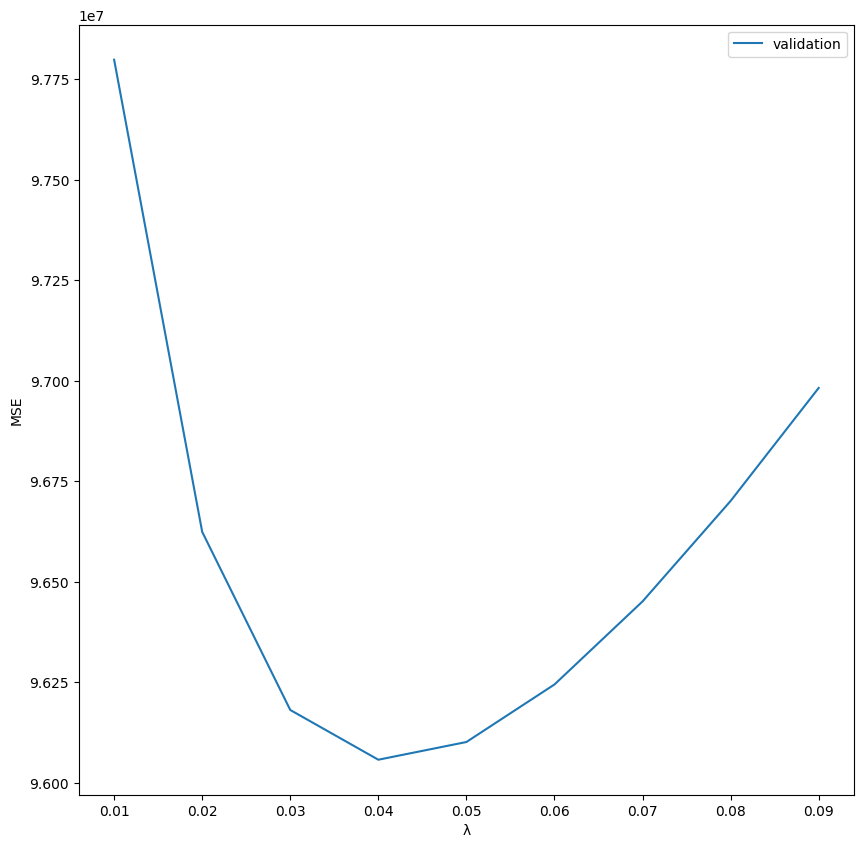

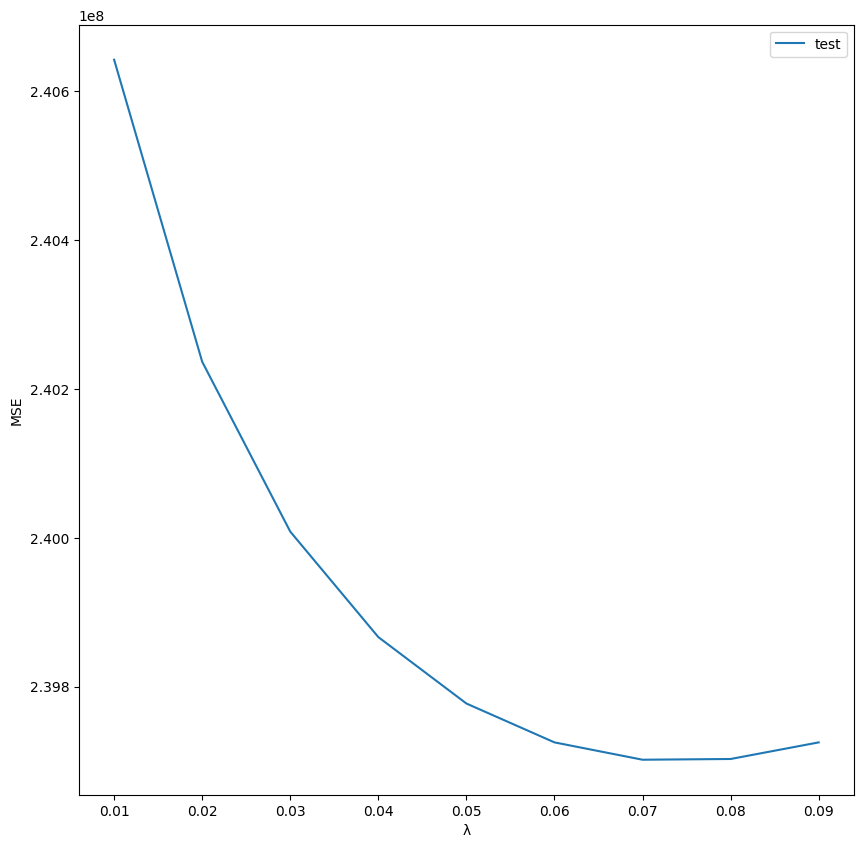

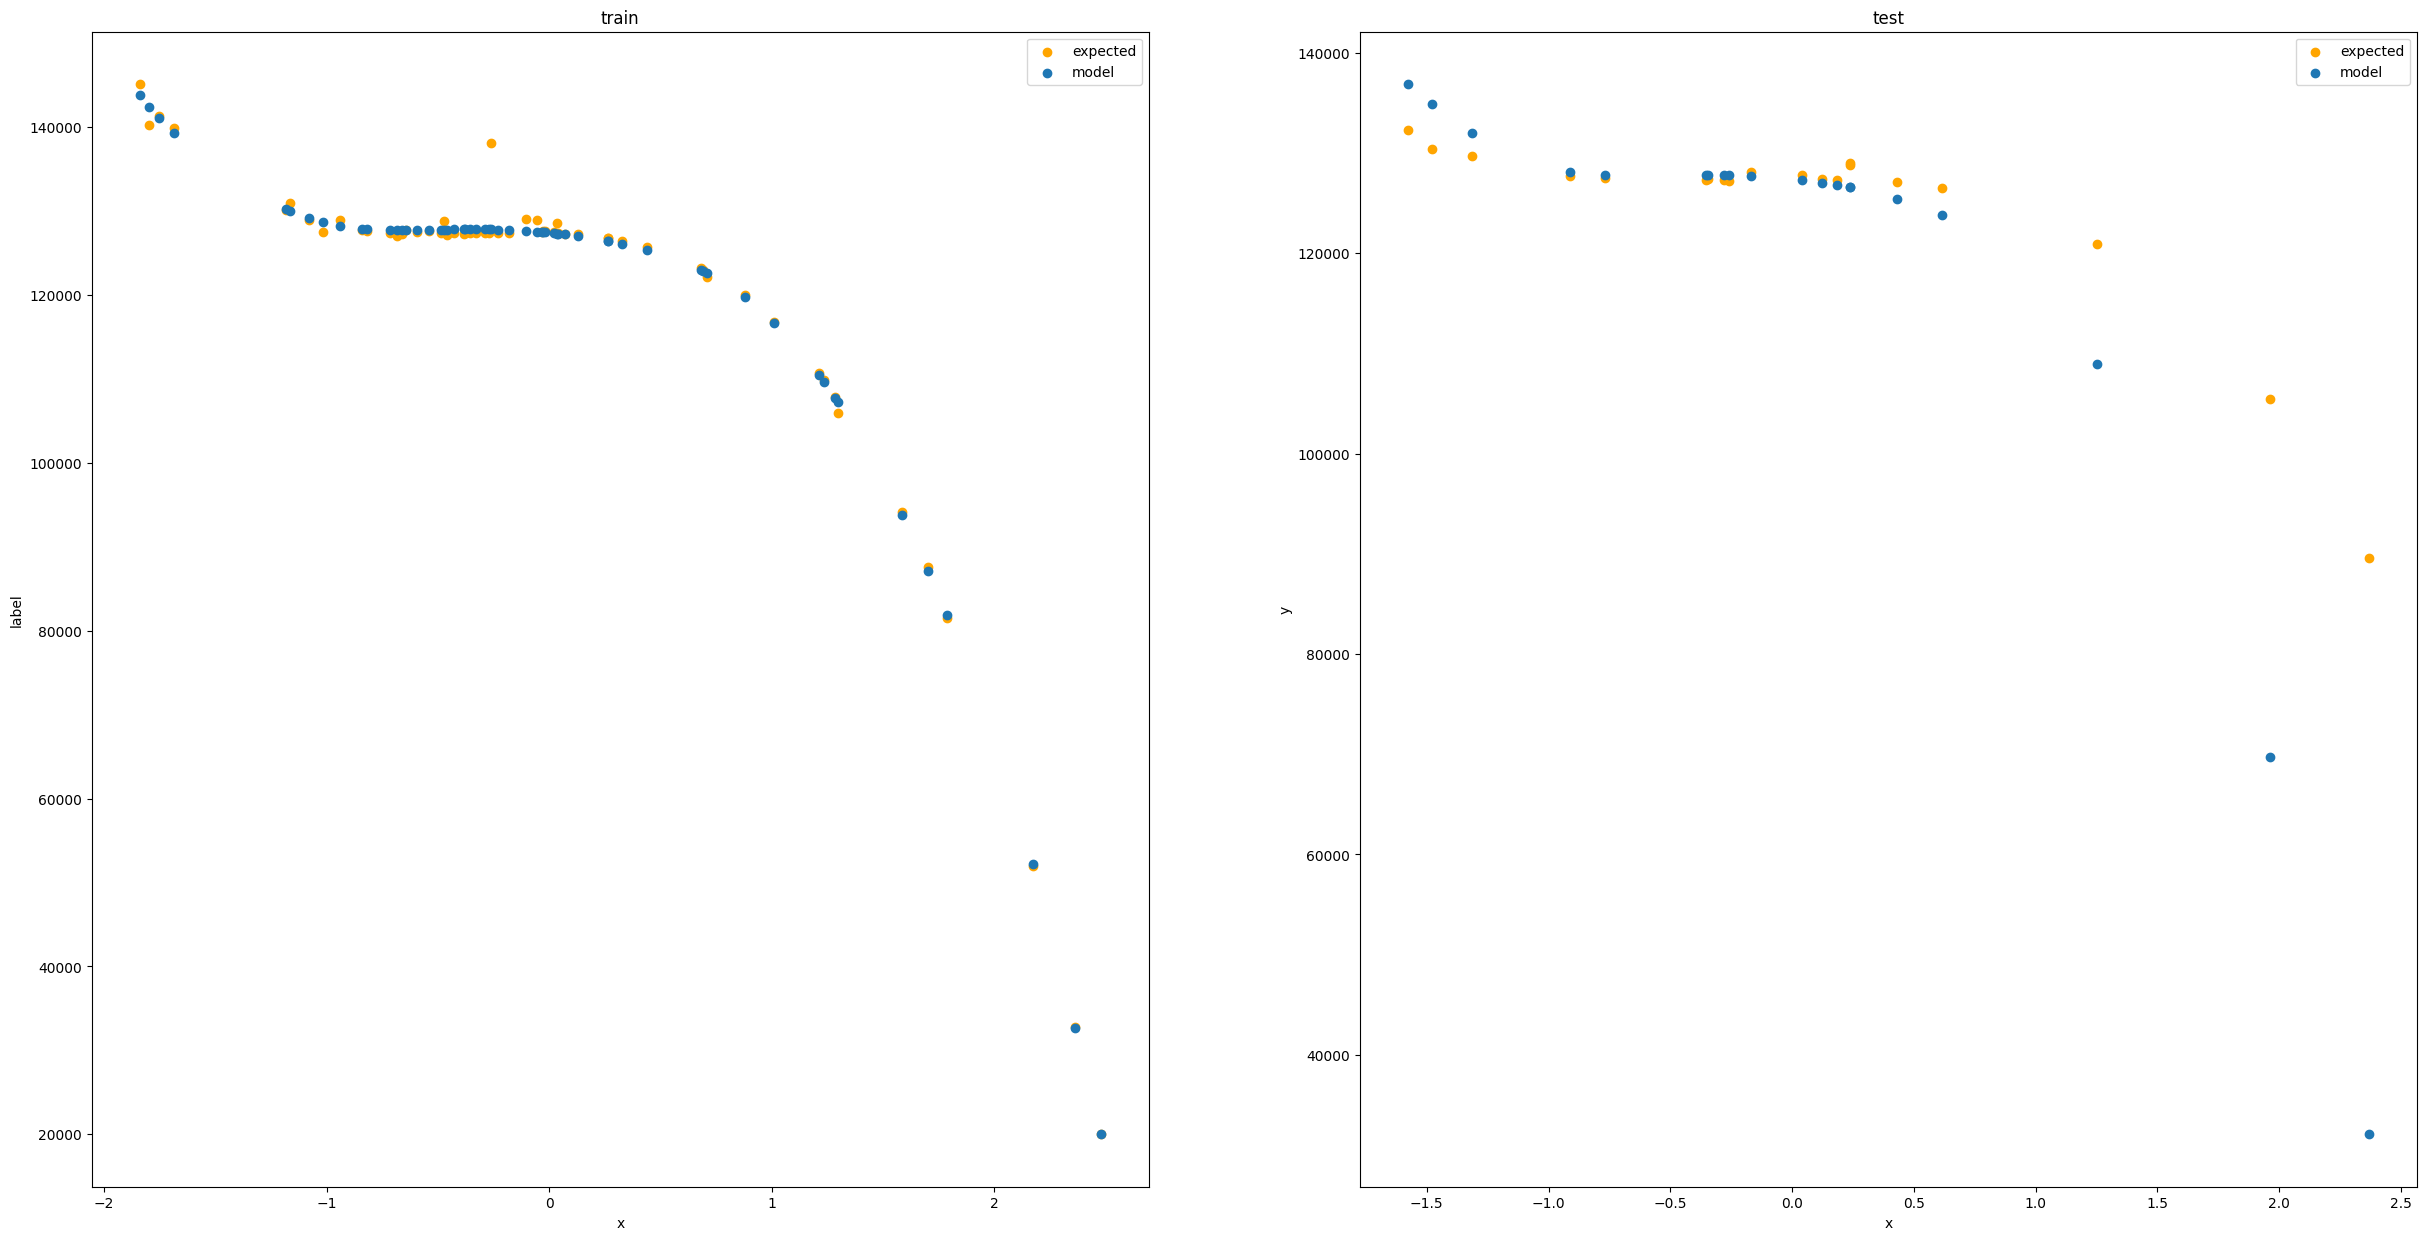

In [12]:
plot_best()